In [1]:
## Gale & Church Algorithm (Length-based)
# https://www.nltk.org/api/nltk.translate.html#module-nltk.translate.gale_church
# https://www.aclweb.org/anthology/P94-1012.pdf

import bucc_proc as bp
import importlib
importlib.reload(bp)
from nltk.translate import gale_church

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
len("我是你的爸爸！")
test = "“下雨了！”小明大叫到，然后赶紧关好房间的窗口。"
bp.zh_proc("“下雨了！”小明大叫到，然后赶紧关好房间的窗口。")
bp.jieba.lcut(test)

['“',
 '下雨',
 '了',
 '！',
 '”',
 '小明',
 '大叫',
 '到',
 '，',
 '然后',
 '赶紧',
 '关',
 '好',
 '房间',
 '的',
 '窗口',
 '。']

In [11]:
len("I'm your dad!")
test = "\"It's raining!\" Tom shouted loudly, then rushed to close tight his room windows."
bp.en_proc("\"It's raining!\" Tom shouted loudly, then rushed to close tight his room windows.")
bp.word_tokenize(test)

['``',
 'It',
 "'s",
 'raining',
 '!',
 "''",
 'Tom',
 'shouted',
 'loudly',
 ',',
 'then',
 'rushed',
 'to',
 'close',
 'tight',
 'his',
 'room',
 'windows',
 '.']

In [10]:
new_df = bp.get_merge()
new_df.count

Merged file exists, reading...


<bound method DataFrame.count of              ID_zh         ID_en                             Sentence_zh  \
0     zh-000000033  en-000005983               1989年以前，全球经济包含大约8亿到10亿人口。   
1     zh-000000231  en-000047360        今日全球面临的威胁是超民族的，因此也必须采取超民族的方式来应对。   
2     zh-000000272  en-000027140                   欧盟移民政策的硬伤还有一个不太显著的方面。   
3     zh-000000438  en-000065621           只有让民粹主义服务于自由主义改革，政府才能取得长久的利益。   
4     zh-000000639  en-000005169       但社会民主派必须理解为何示威的发展会独立于现有的有组织中左翼政治。   
...            ...           ...                                     ...   
1848  zh-000094590  en-000013258         事件发生后当局在尚未进行调查的情况下就匆匆掩埋了出事列车残骸。   
1849  zh-000094593  en-000061419             北方拥有丰富的自然资源，就连电力也是从北方输送到南方。   
1850  zh-000094607  en-000039373                如果利率为3%，那么年税收额必须增加15亿美元。   
1851  zh-000094611  en-000003807           五年前，叙利亚北部边陲城镇享受着土耳其高速经济增长的红利。   
1852  zh-000094633  en-000083972  在过去的一个世纪中，我们的世界发生了翻天覆地的变化——技术是其中的重要原因。   

                                            Sentence_e

In [3]:
def get_length(sentence, groupby="char", lang ="en"):
    if groupby == "char":
        n = len(sentence)
        
    elif groupby == "word":
        if lang == "en":
            n = len(bp.word_tokenize(sentence))
        elif lang == "zh":
            n = len(bp.jieba.lcut(sentence))
            
    elif groupby == "special":
        # count each Chinese character as having length 2, and each English or punctuation character as having length 1
        if lang == "zh":
            n=0
            for c in sentence:
                if c in bp.punctuation:
                    n+=1
                else:
                    n+=2
        else:
            n = len(sentence)
            
    return n
    

In [15]:
Path = bp.Path

gc_file = Path("zh-en.training.gc")

if gc_file.is_file():
    print('GC file exists, reading...')
    gc_df = pd.read_csv(gc_file, header=0, sep='\t')

else:
    
    print('GC file does not exist, creating...')
    
    gc_df = new_df
    gc_df['char_en'] = [get_length(new_df.iloc[i]['Sentence_en']) for i in range(1853)]
    gc_df['char_zh'] = [get_length(new_df.iloc[i]['Sentence_zh'], lang="zh") for i in range(1853)]
    gc_df['word_en'] = [get_length(new_df.iloc[i]['Sentence_en'], "word") for i in range(1853)]
    gc_df['word_zh'] = [get_length(new_df.iloc[i]['Sentence_zh'], "word", "zh") for i in range(1853)]
    gc_df['special_en'] = [get_length(new_df.iloc[i]['Sentence_en'], "special") for i in range(1853)]
    gc_df['special_zh'] = [get_length(new_df.iloc[i]['Sentence_zh'], "special", "zh") for i in range(1853)]
    gc_df.to_csv(gc_file, index=False, sep='\t')

GC file does not exist, creating...


In [16]:
gc_df

,ID_zh,ID_en,Sentence_zh,Sentence_en,char_en,char_zh,word_en,word_zh,special_en,special_zh
0,zh-000000033,en-000005983,1989年以前，全球经济包含大约8亿到10亿人口。,"Until 1989, the global market encompassed betw...",85,25,15,14,85,48
1,zh-000000231,en-000047360,今日全球面临的威胁是超民族的，因此也必须采取超民族的方式来应对。,The threats facing the world today are suprana...,103,32,18,21,103,62
2,zh-000000272,en-000027140,欧盟移民政策的硬伤还有一个不太显著的方面。,"There is another, less obvious, reason why the...",82,21,18,12,82,41
3,zh-000000438,en-000065621,只有让民粹主义服务于自由主义改革，政府才能取得长久的利益。,Only if populism is put at the service of libe...,102,29,18,15,102,56
4,zh-000000639,en-000005169,但社会民主派必须理解为何示威的发展会独立于现有的有组织中左翼政治。,But social democrats must understand why the p...,129,33,19,20,129,65
...,...,...,...,...,...,...,...,...,...,...
1848,zh-000094590,en-000013258,事件发生后当局在尚未进行调查的情况下就匆匆掩埋了出事列车残骸。,The wrecked body of the ruined train was burie...,93,31,16,19,93,61
1849,zh-000094593,en-000061419,北方拥有丰富的自然资源，就连电力也是从北方输送到南方。,"Natural resources were abundant in the North, ...",100,27,18,15,100,52
1850,zh-000094607,en-000039373,如果利率为3%，那么年税收额必须增加15亿美元。,"If it is 3%, the required increase in annual t...",87,24,21,14,87,45
1851,zh-000094611,en-000003807,五年前，叙利亚北部边陲城镇享受着土耳其高速经济增长的红利。,"Five years ago, Syria’s northern border towns ...",106,29,21,16,106,56


In [22]:
print(new_df.iloc[1]['Sentence_en'])

The threats facing the world today are supranational, so counteracting them must be supranational, too.


In [77]:
en_len = [get_length(new_df.iloc[11]['Sentence_en'], "special")]
zh_len = [get_length(new_df.iloc[11]['Sentence_zh'], "special", "zh")]

round(gale_church.align_log_prob(0, 0, zh_len, en_len, (1,1), gale_church.LanguageIndependent), 4)

2.0832

<function matplotlib.pyplot.show(*args, **kw)>

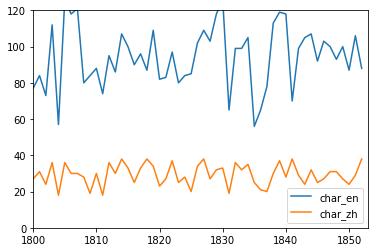

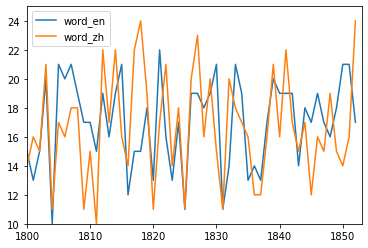

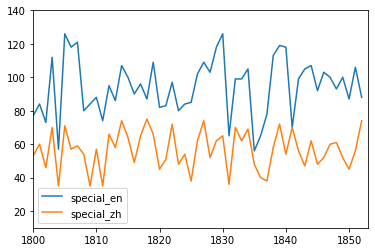

In [76]:
import matplotlib.pyplot as plt
a = 1800
b = 1853



gc_df.plot(y=['char_en','char_zh'], legend=True, kind="line")

plt.xlim(a, b)
plt.ylim(0, 120)


gc_df.plot(y=['word_en','word_zh'], legend=True, kind="line")

plt.xlim(a, b)
plt.ylim(10, 25)


gc_df.plot(y=['special_en', 'special_zh'], legend=True, kind="line")

plt.xlim(a, b)
plt.ylim(10, 140)

plt.show

In [84]:
#lp_df = gc_df.drop(columns = ['char_en', 'char_zh', 'word_en', 'word_zh'])

lp_df = gc_df
lp_df['char_lp'] = [round(gale_church.align_log_prob(i+1, i+1, gc_df['char_en'], gc_df['char_zh'], (1,1), gale_church.LanguageIndependent), 3) for i in range(1853)]
lp_df['word_lp'] = [round(gale_church.align_log_prob(i+1, i+1, gc_df['word_en'], gc_df['word_zh'], (1,1), gale_church.LanguageIndependent), 3) for i in range(1853)]
lp_df['special_lp'] = [round(gale_church.align_log_prob(i+1, i+1, gc_df['special_en'], gc_df['special_zh'], (1,1), gale_church.LanguageIndependent), 3) for i in range(1853)]

In [85]:
lp_df

,ID_zh,ID_en,Sentence_zh,Sentence_en,char_en,char_zh,word_en,word_zh,special_en,special_zh,special_lp,char_lp,word_lp
0,zh-000000033,en-000005983,1989年以前，全球经济包含大约8亿到10亿人口。,"Until 1989, the global market encompassed betw...",85,25,15,14,85,48,2.619,6.373,0.200
1,zh-000000231,en-000047360,今日全球面临的威胁是超民族的，因此也必须采取超民族的方式来应对。,The threats facing the world today are suprana...,103,32,18,21,103,62,2.600,7.108,0.347
2,zh-000000272,en-000027140,欧盟移民政策的硬伤还有一个不太显著的方面。,"There is another, less obvious, reason why the...",82,21,18,12,82,41,3.218,6.915,0.710
3,zh-000000438,en-000065621,只有让民粹主义服务于自由主义改革，政府才能取得长久的利益。,Only if populism is put at the service of libe...,102,29,18,15,102,56,3.170,7.636,0.369
4,zh-000000639,en-000005169,但社会民主派必须理解为何示威的发展会独立于现有的有组织中左翼政治。,But social democrats must understand why the p...,129,33,19,20,129,65,4.482,10.170,0.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,zh-000094590,en-000013258,事件发生后当局在尚未进行调查的情况下就匆匆掩埋了出事列车残骸。,The wrecked body of the ruined train was burie...,93,31,16,19,93,61,1.937,6.095,0.361
1849,zh-000094593,en-000061419,北方拥有丰富的自然资源，就连电力也是从北方输送到南方。,"Natural resources were abundant in the North, ...",100,27,18,15,100,52,3.477,7.838,0.369
1850,zh-000094607,en-000039373,如果利率为3%，那么年税收额必须增加15亿美元。,"If it is 3%, the required increase in annual t...",87,24,21,14,87,45,3.165,6.856,0.768
1851,zh-000094611,en-000003807,五年前，叙利亚北部边陲城镇享受着土耳其高速经济增长的红利。,"Five years ago, Syria’s northern border towns ...",106,29,21,16,106,56,3.524,8.146,0.539


<function matplotlib.pyplot.show(*args, **kw)>

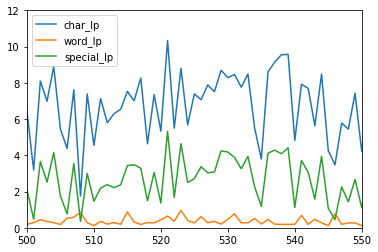

In [137]:
zoom = lambda x,y : (x,x+y)

a = 500
b = 50



lp_df.plot(y=['char_lp','word_lp','special_lp'], legend=True, kind="line")

plt.xlim(zoom(a,b))
plt.ylim(0, 12)



plt.show

In [151]:
#lp_df['special_bool'] = 

lp_df['special_lp'].apply(lambda x: "YES" if x < 1 else "NO").value_counts()

NO     1753
YES     100
Name: special_lp, dtype: int64

In [148]:
from random import randrange

def negatest(t,n=0, groupby="char", criteria=1):
    
    tn=0 #true negatives
    fp=0 #false positives
    
    start_n = n
    
    while t > n:
        x = randrange(1853)
        y = randrange(1853)
        if x != y:
            en_len = get_length(new_df.iloc[x]['Sentence_en'], groupby=groupby)
            zh_len = get_length(new_df.iloc[y]['Sentence_zh'], lang="zh", groupby=groupby)
            diff_value = abs(en_len-zh_len)
            this_value = gale_church.align_log_prob(1, 1, [en_len], [zh_len], (1,1), gale_church.LanguageIndependent)
            
            x = str(x)
            y = str(y)
            
            if this_value<criteria:
                j = "YES"
                fp+=1
            else:
                j = "NO"
                tn+=1
            
            
            print('Line:',x,'\t',y, '\tDiff:', diff_value, '\tLogProb:', round(this_value,2), '\tPair:', j)
            n+=1
    
    print('\nAccuracy:' + str(round(tn/(t-start_n)*100,1))+'%')
    
    return

negatest(10, groupby="special", criteria=1)
            

Line: 33 	 686 	Diff: 59 	LogProb: 5.02 	Pair: NO
Line: 1807 	 104 	Diff: 66 	LogProb: 5.08 	Pair: NO
Line: 1386 	 15 	Diff: 20 	LogProb: 1.1 	Pair: NO
Line: 628 	 1213 	Diff: 14 	LogProb: 0.79 	Pair: YES
Line: 1658 	 694 	Diff: 57 	LogProb: 4.02 	Pair: NO
Line: 994 	 648 	Diff: 65 	LogProb: 5.22 	Pair: NO
Line: 1527 	 540 	Diff: 54 	LogProb: 3.48 	Pair: NO
Line: 1639 	 1541 	Diff: 54 	LogProb: 4.39 	Pair: NO
Line: 789 	 211 	Diff: 37 	LogProb: 2.08 	Pair: NO
Line: 1365 	 1246 	Diff: 55 	LogProb: 4.64 	Pair: NO

Accuracy:90.0%


In [147]:
x, y = (997,305)
groupby = "special"
en_len = get_length(new_df.iloc[x]['Sentence_en'], groupby=groupby)
zh_len = get_length(new_df.iloc[y]['Sentence_zh'], lang="zh", groupby=groupby)
print(new_df.iloc[x]['Sentence_en'], get_length(new_df.iloc[x]['Sentence_en'], groupby=groupby))
print(new_df.iloc[y]['Sentence_zh'], get_length(new_df.iloc[y]['Sentence_zh'], lang="zh", groupby=groupby))
print(gale_church.align_log_prob(1, 1, [en_len], [zh_len], (1,1), gale_church.LanguageIndependent))

This year, China will surpass the US in emissions of greenhouse gases. 70
第三，政府应该用再造预算（reengineeringbudget）武装自己。 74
0.27138351724039533


In [133]:
lp_df['special_lp'].max()

8.697

In [134]:
lp_df['special_lp'].min()

0.117